<a href="https://colab.research.google.com/github/Lee-Lin-Qin/Lin_Qin_Projects/blob/main/Machine_Learning_Prediction_Of_Credit_Card_Fraud_Detection_Based_On_Imbalanced_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# transform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Resampling and split
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter


# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier 
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, recall_score
from sklearn import metrics

#Feature Selection
from sklearn.decomposition import PCA

pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Get the data and EDA

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [5]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/creditcard.csv', sep=',', header=0) 

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

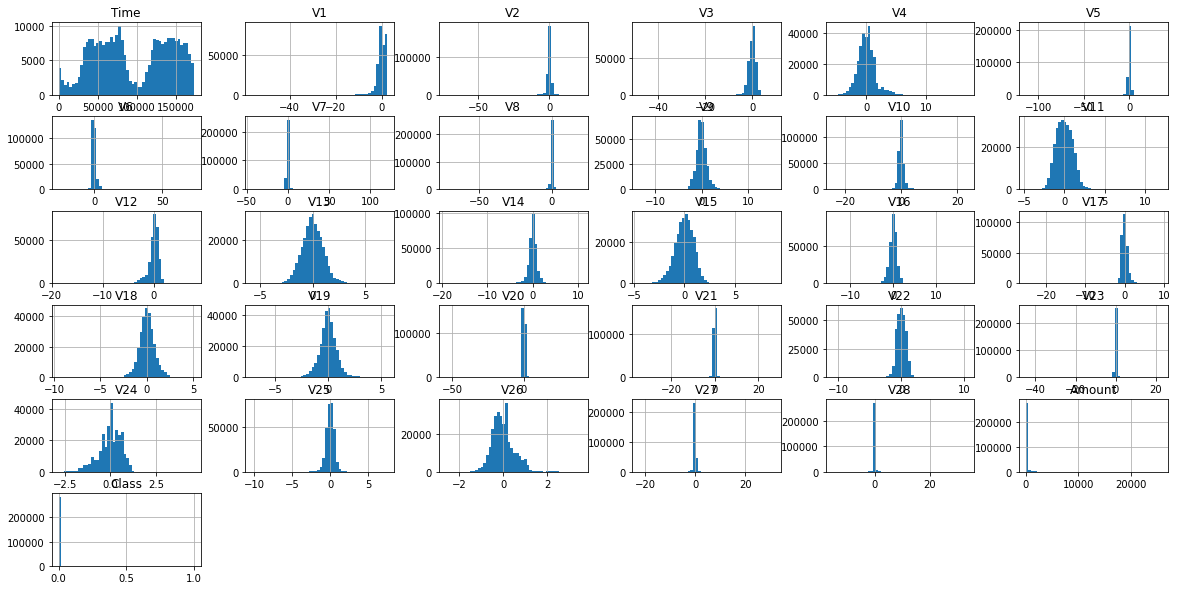

In [ ]:
data.hist(bins = 50, figsize = (20, 10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

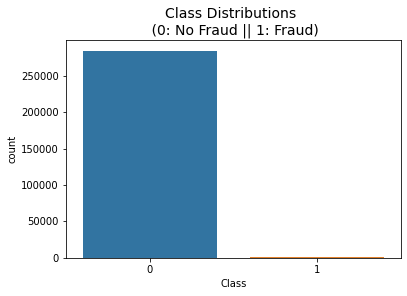

In [ ]:
sns.countplot('Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
print('No Frauds is', round(data['Class'].value_counts()[0]/len(data)*100,3), '% of the original dataset')
print('Frauds is', round(data['Class'].value_counts()[1]/len(data)*100,3), '% of the original dataset')
print('The ratio of Frauds: No Frauds is', round(data['Class'].value_counts()[1]/data['Class'].value_counts()[0]*100,3), '% ')

No Frauds is 99.827 % of the original dataset
Frauds is 0.173 % of the original dataset
The ratio of Frauds: No Frauds is 0.173 % 


# Split-train-test-and transforming

## Scalling, Split Traing and Test

In [7]:
random_state = 123
x = data.drop(['Class'], axis=1)
y = data['Class']
xs = StandardScaler().fit_transform(x)
x_train, x_test,y_train, y_test  = train_test_split(
        xs,y, test_size=0.2, random_state=random_state
)

In [87]:
type(x_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [8]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)
x_train.columns=x.columns
x_test.columns=x.columns

In [9]:
x_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [59]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

# Resampling

##Random Oversampling

In [10]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x_train, y_train)
X_over = pd.DataFrame(X_over)
X_over.columns = x_train.columns
# summarize class distribution
print(Counter(y_over))

Counter({0: 227468, 1: 227468})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
X_over.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.585723,-0.442245,-0.556907,1.332797,-1.077640,-0.750436,1.619768,-0.227952,0.509266,-0.541761,-0.176368,-0.600138,-0.947888,-0.210695,-0.907203,-0.259742,1.809280,-0.201369,0.130365,1.509764,0.854596,0.695808,1.590985,-0.113369,-2.771450,0.982105,0.329896,0.110660,0.192368,0.562332
1,-0.871269,0.493833,-0.108761,0.208277,0.956508,-0.198260,0.104655,-0.004748,0.146279,0.177950,0.037532,0.947246,0.613471,-1.352705,0.530287,-0.720529,-0.527841,0.094679,-0.389154,-0.117208,-0.118034,-0.020529,-0.108764,-0.210852,-0.002120,1.083994,-0.692982,0.033780,0.051830,-0.001598
2,-0.856507,-0.212220,0.654427,0.445733,0.557481,0.114917,0.323332,0.109832,0.562161,-0.911002,-0.274154,1.513255,1.052908,0.188222,0.872794,0.832953,-0.629691,0.304970,-0.375982,-0.116830,-0.212588,0.391942,1.077863,0.007706,-0.448186,-0.578804,-0.595164,-0.037716,-0.103712,-0.289660
3,1.508256,1.039710,-0.013244,-0.715842,0.353337,-0.077335,-0.920403,0.151887,-0.334701,0.291889,0.149898,-0.532809,0.636854,0.928042,0.230334,0.650714,0.105514,-0.698766,-0.405259,-0.410871,-0.180311,0.217116,0.804256,0.146035,0.184237,0.006683,0.785582,-0.138236,-0.171314,-0.285102
4,0.895049,-2.256769,-2.039358,2.202207,4.273675,1.913809,0.269798,-3.874862,-1.478089,-0.352373,0.998309,-0.195855,1.038480,0.021380,-0.649065,-1.610698,-0.018255,0.808880,0.924461,2.202451,0.225812,-1.825824,1.547818,-0.842399,0.298473,0.061449,1.424865,2.106633,-0.432660,0.156766


## Undersampling

In [12]:
# define oversampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority',)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(x_train, y_train)
X_under = pd.DataFrame(X_under)
X_under.columns = x_train.columns
# summarize class distribution
print(Counter(y_under))

Counter({0: 377, 1: 377})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [75]:
X_under.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.376896,1.015618,-0.267541,0.108192,0.252543,-0.754862,-0.382753,-0.685135,-0.013359,1.164919,-0.031295,-0.734195,0.721921,0.894478,-0.486001,0.751097,0.712788,-0.789104,-0.080455,-0.389672,-0.194930,0.050924,0.440667,0.512704,0.152325,-1.099584,0.989990,-0.014757,-0.113809,-0.349231
1,-0.422082,-0.390259,-0.001251,1.143753,-0.788042,-1.000019,-0.100685,-0.520720,0.305374,-0.698524,0.494086,0.515626,-0.098036,-0.731043,-0.127510,-0.351782,-1.208207,-0.105876,2.356177,-0.424649,-0.765194,-0.193032,0.143557,-0.092335,0.603786,-0.602900,2.204635,-1.311763,-0.913307,-0.255756
2,1.396249,1.100880,-0.429506,-0.910665,-0.364212,-0.227020,-0.443268,-0.241932,-0.182815,-0.379517,0.790608,-1.306673,-0.257284,-0.039143,0.191102,0.022115,-1.665300,-0.148627,0.773876,-0.560421,-0.723242,-0.912939,-2.004837,0.650814,0.698801,-0.767207,0.612455,-0.166585,-0.149048,-0.233287
3,1.107144,0.266215,-1.720710,-1.149084,0.320368,-0.102015,1.538305,0.136575,0.357996,0.771420,-0.324027,0.702317,1.000720,-0.314155,0.356477,0.137838,-0.301046,0.126201,-1.478542,-0.580823,1.525247,0.101980,-1.674356,-0.185459,-1.554346,-1.990903,0.315637,-0.346031,0.166927,2.513039
4,1.563680,-0.589503,-0.106326,-0.224396,-2.150674,0.874834,0.533041,1.364447,-0.714038,-2.495951,1.379463,-0.099524,-1.022155,0.889416,-0.589535,-0.053068,-2.914500,1.532628,-2.218016,-1.317056,-0.774208,0.080344,1.679584,-0.916620,-0.408447,2.381978,0.799647,-2.210711,-1.129560,0.086560


## SMOTE

In [13]:
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(x_train, y_train)
X_smote = pd.DataFrame(X_smote)
X_smote.columns = x_train.columns
print(Counter(y_smote))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 227468, 1: 227468})


In [73]:
X_smote.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.585723,-0.442245,-0.556907,1.332797,-1.077640,-0.750436,1.619768,-0.227952,0.509266,-0.541761,-0.176368,-0.600138,-0.947888,-0.210695,-0.907203,-0.259742,1.809280,-0.201369,0.130365,1.509764,0.854596,0.695808,1.590985,-0.113369,-2.771450,0.982105,0.329896,0.110660,0.192368,0.562332
1,-0.871269,0.493833,-0.108761,0.208277,0.956508,-0.198260,0.104655,-0.004748,0.146279,0.177950,0.037532,0.947246,0.613471,-1.352705,0.530287,-0.720529,-0.527841,0.094679,-0.389154,-0.117208,-0.118034,-0.020529,-0.108764,-0.210852,-0.002120,1.083994,-0.692982,0.033780,0.051830,-0.001598
2,-0.856507,-0.212220,0.654427,0.445733,0.557481,0.114917,0.323332,0.109832,0.562161,-0.911002,-0.274154,1.513255,1.052908,0.188222,0.872794,0.832953,-0.629691,0.304970,-0.375982,-0.116830,-0.212588,0.391942,1.077863,0.007706,-0.448186,-0.578804,-0.595164,-0.037716,-0.103712,-0.289660
3,1.508256,1.039710,-0.013244,-0.715842,0.353337,-0.077335,-0.920403,0.151887,-0.334701,0.291889,0.149898,-0.532809,0.636854,0.928042,0.230334,0.650714,0.105514,-0.698766,-0.405259,-0.410871,-0.180311,0.217116,0.804256,0.146035,0.184237,0.006683,0.785582,-0.138236,-0.171314,-0.285102
4,0.895049,-2.256769,-2.039358,2.202207,4.273675,1.913809,0.269798,-3.874862,-1.478089,-0.352373,0.998309,-0.195855,1.038480,0.021380,-0.649065,-1.610698,-0.018255,0.808880,0.924461,2.202451,0.225812,-1.825824,1.547818,-0.842399,0.298473,0.061449,1.424865,2.106633,-0.432660,0.156766


# Feature Selection-Correlation Analysis

In [14]:
def combine(X, y):
  train = X.copy()
  train['Class'] = y
  return train

In [15]:
train = combine(x_train, y)
train_upsampled = combine(X_over, y_over)
train_downsampled = combine(X_under, y_under)
train_smote = combine(X_smote, y_smote)

In [16]:
train.shape, train_smote.shape

((227845, 31), (454936, 31))

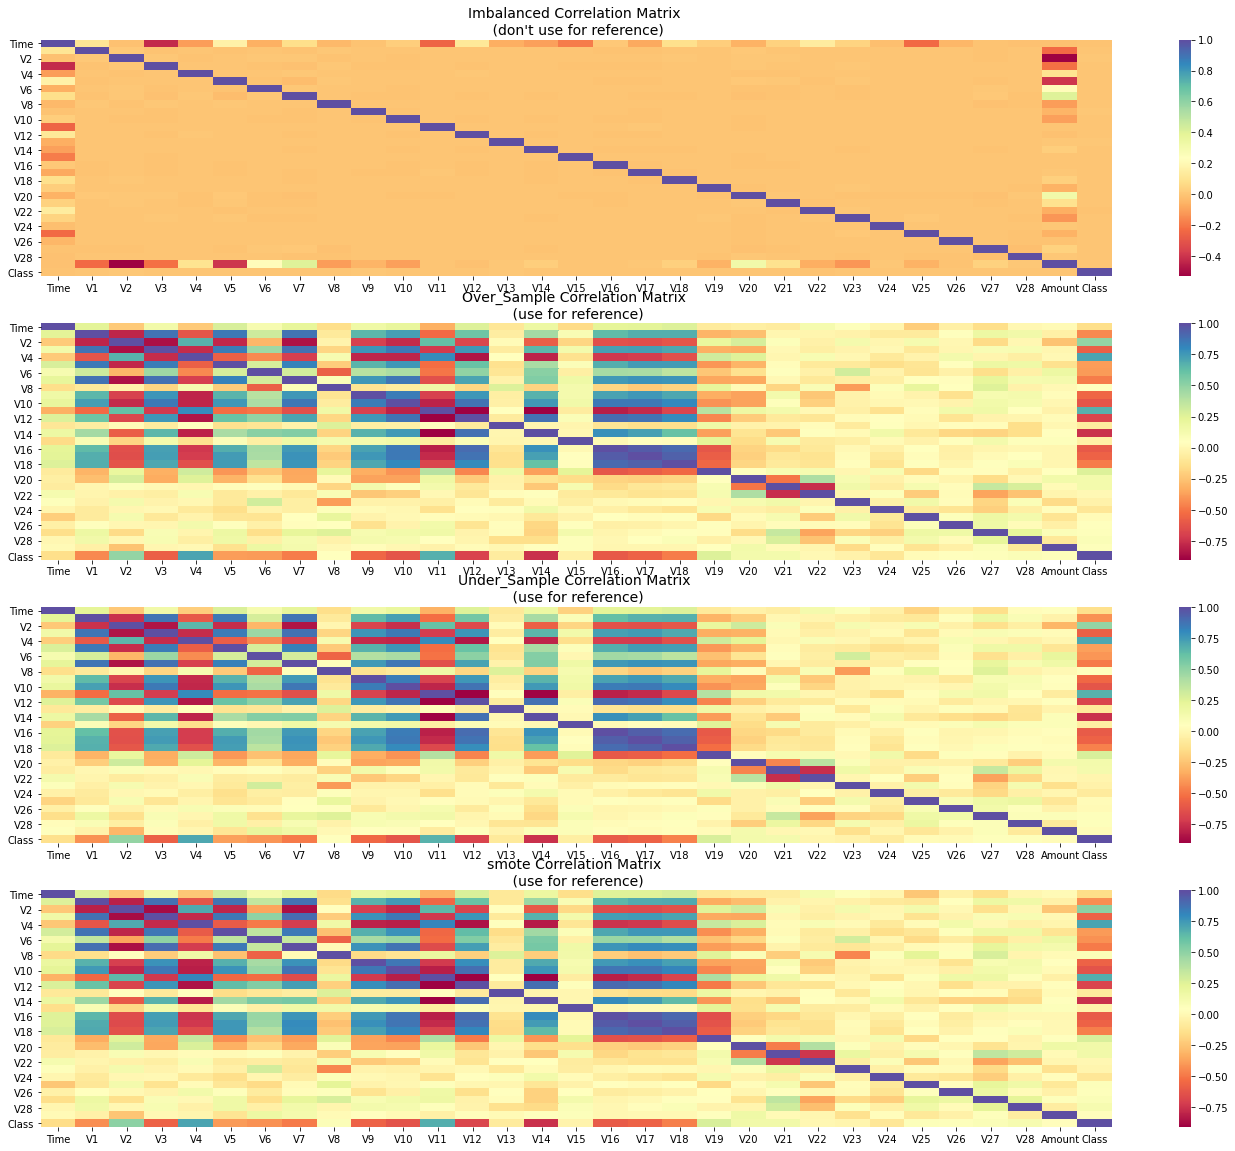

In [123]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(24,20))

corr = train.corr()
sns.heatmap(corr, cmap='Spectral', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


over_sample_corr = train_upsampled.corr()
sns.heatmap(over_sample_corr, cmap='Spectral', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Over_Sample Correlation Matrix \n (use for reference)', fontsize=14)

under_sample_corr = train_downsampled.corr()
sns.heatmap(under_sample_corr, cmap='Spectral', annot_kws={'size':20}, ax=ax3)
ax3.set_title('Under_Sample Correlation Matrix \n (use for reference)', fontsize=14)

smote_corr = train_smote.corr()
sns.heatmap(smote_corr, cmap='Spectral', annot_kws={'size':20}, ax=ax4)
ax4.set_title('smote Correlation Matrix \n (use for reference)', fontsize=14)

plt.show()

# Modeling

In [17]:
def auc_roc(y_test, y_pred_proba):
      # AUC-ROC
    print(roc_auc_score(y_test, y_pred_proba, average='micro'))
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)
    df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [18]:
def clf(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)# fit the model with training data
    y_pred = model.predict(X_test) # predicted label for the test data
    y_pred_proba = model.predict_proba(X_test)[:,1] # predicted score for the test data 
    
    # Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
    
    # classificatio reprot
    target_names = ['0','1']
    print(metrics.classification_report(y_test, y_pred, target_names = ['class 0','calss 1'], digits=4))
    return(y_test, y_pred_proba)

## Modeling Without Selecting Features

###Logistic Regression

####Random Undersampling

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

     class 0     0.9999    0.9646    0.9819     56847
     calss 1     0.0505    0.9304    0.0958       115

    accuracy                         0.9646     56962
   macro avg     0.5252    0.9475    0.5389     56962
weighted avg     0.9979    0.9646    0.9801     56962



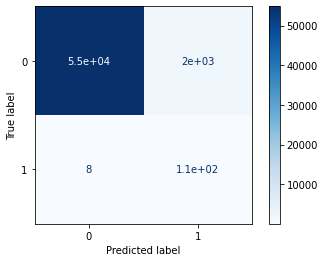

In [19]:
lg = LogisticRegression(max_iter=1000, penalty = 'l1', solver='saga')
lg_y_test, lg_y_pro=clf(X_under, y_under, x_test, y_test, lg)

0.9809128392687924


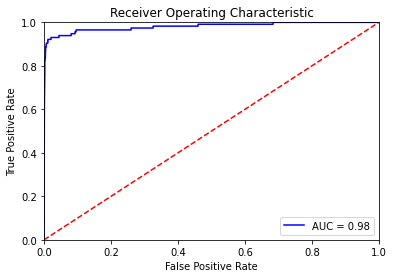

In [20]:
auc_roc(lg_y_test, lg_y_pro)

####Random Oversampling

              precision    recall  f1-score   support

     class 0     0.9999    0.9755    0.9875     56847
     calss 1     0.0712    0.9304    0.1323       115

    accuracy                         0.9754     56962
   macro avg     0.5355    0.9529    0.5599     56962
weighted avg     0.9980    0.9754    0.9858     56962



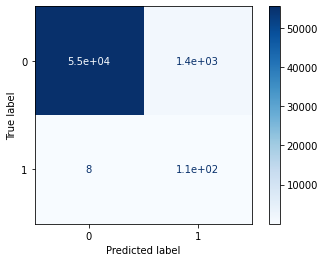

In [31]:
lg_over = LogisticRegression(max_iter=1000, penalty = 'l1', solver='saga')
lg_over_y_test, lg_over_y_pro=clf(X_over, y_over, x_test, y_test, lg_over)

0.9850386353606668


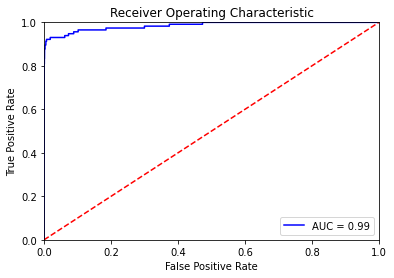

In [32]:
auc_roc(lg_over_y_test, lg_over_y_pro)

####Smote

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

     class 0     0.9999    0.9742    0.9868     56847
     calss 1     0.0679    0.9304    0.1266       115

    accuracy                         0.9741     56962
   macro avg     0.5339    0.9523    0.5567     56962
weighted avg     0.9980    0.9741    0.9851     56962



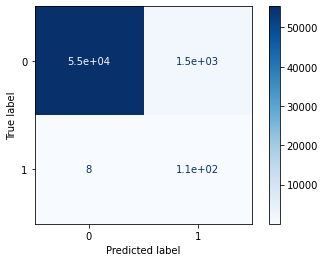

In [33]:
lg_smote = LogisticRegression(max_iter=1000, penalty = 'l1', solver='saga')
lg_smote_y_test, lg_smote_y_pro=clf(X_smote, y_smote, x_test, y_test, lg_smote)

0.9856842279161226


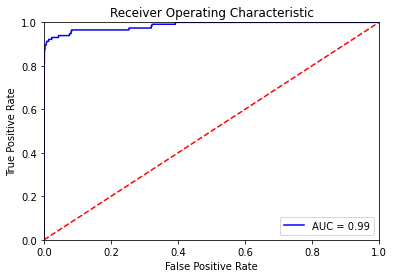

In [36]:
auc_roc(lg_smote_y_test, lg_smote_y_pro)

###Random Forest

####Random Undersampling

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


              precision    recall  f1-score   support

     class 0     0.9999    0.9685    0.9839     56847
     calss 1     0.0564    0.9304    0.1064       115

    accuracy                         0.9685     56962
   macro avg     0.5281    0.9495    0.5452     56962
weighted avg     0.9980    0.9685    0.9822     56962



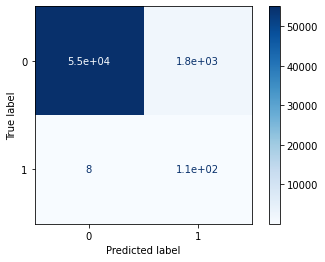

In [139]:
rf = RandomForestClassifier()
rf_y_test, rf_y_pro=clf(X_under, y_under, x_test, y_test, rf)

0.9843115119837306


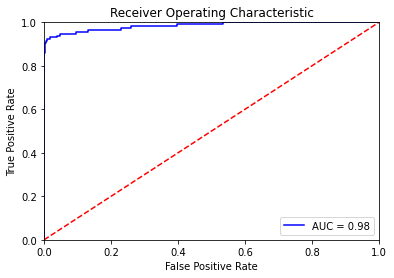

In [145]:
auc_roc(rf_y_test, rf_y_pro)

####Random Oversampling

              precision    recall  f1-score   support

     class 0     0.9996    0.9999    0.9998     56847
     calss 1     0.9485    0.8000    0.8679       115

    accuracy                         0.9995     56962
   macro avg     0.9740    0.9000    0.9338     56962
weighted avg     0.9995    0.9995    0.9995     56962



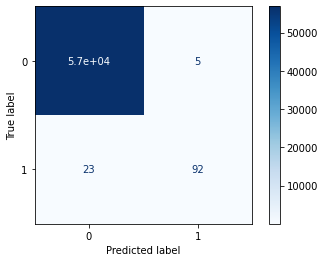

In [34]:
rf_over = RandomForestClassifier()
rf_over_y_test, rf_over_y_pro=clf(X_over, y_over, x_test, y_test,rf_over)

0.9724668274338212


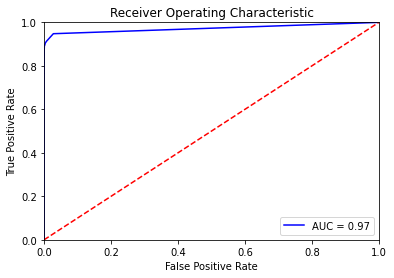

In [37]:
auc_roc(rf_over_y_test, rf_over_y_pro)

####Smote

              precision    recall  f1-score   support

     class 0     0.9996    0.9998    0.9997     56847
     calss 1     0.8785    0.8174    0.8468       115

    accuracy                         0.9994     56962
   macro avg     0.9391    0.9086    0.9233     56962
weighted avg     0.9994    0.9994    0.9994     56962



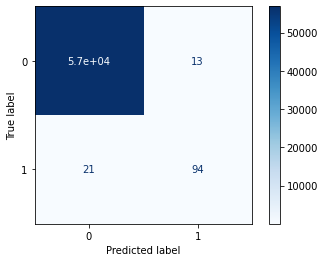

In [35]:
rf_smote = RandomForestClassifier()
rf_smote_y_test, rf_smote_y_pro=clf(X_smote, y_smote, x_test, y_test,rf_smote)

0.9788227897766775


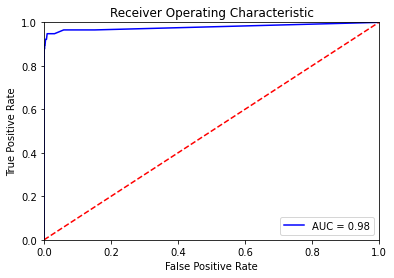

In [38]:
auc_roc(rf_smote_y_test, rf_smote_y_pro)

###XGBoost

####Random Undersampling

              precision    recall  f1-score   support

     class 0     0.9999    0.9670    0.9832     56847
     calss 1     0.0540    0.9304    0.1020       115

    accuracy                         0.9669     56962
   macro avg     0.5269    0.9487    0.5426     56962
weighted avg     0.9979    0.9669    0.9814     56962



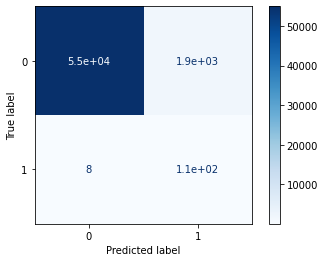

In [25]:
xg = XGBClassifier()
xg_y_test, xg_y_pro=clf(X_under, y_under, x_test, y_test, xg)

0.9808136408865596


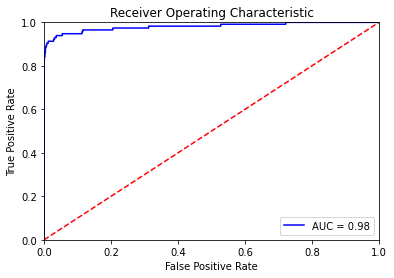

In [26]:
auc_roc(xg_y_test, xg_y_pro)

####Random Oversampling

              precision    recall  f1-score   support

     class 0     0.9998    0.9934    0.9966     56847
     calss 1     0.2174    0.9130    0.3512       115

    accuracy                         0.9932     56962
   macro avg     0.6086    0.9532    0.6739     56962
weighted avg     0.9982    0.9932    0.9953     56962



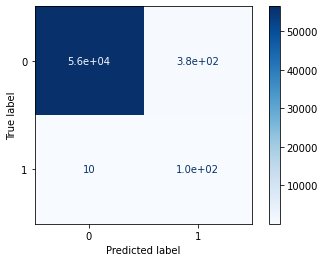

In [27]:
xg_over = XGBClassifier()
xg_over_y_test, xg_over_y_pro=clf(X_over, y_over, x_test, y_test, xg_over)

0.9858537141266297


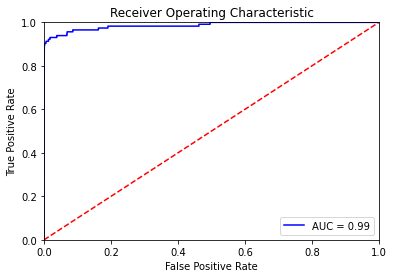

In [28]:
auc_roc(xg_over_y_test, xg_over_y_pro)

####Smote

              precision    recall  f1-score   support

     class 0     0.9998    0.9888    0.9943     56847
     calss 1     0.1432    0.9217    0.2480       115

    accuracy                         0.9887     56962
   macro avg     0.5715    0.9553    0.6211     56962
weighted avg     0.9981    0.9887    0.9928     56962



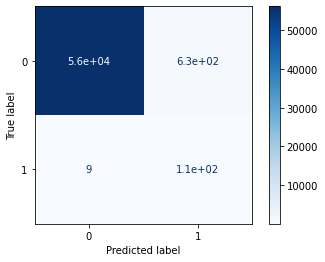

In [29]:
xg_smote = XGBClassifier()
xg_smote_y_test, xg_smote_y_pro=clf(X_smote, y_smote, x_test, y_test, xg_smote)

0.9839324624984991


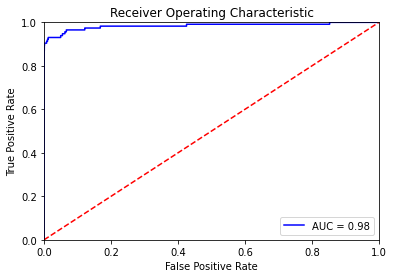

In [30]:
auc_roc(xg_smote_y_test, xg_smote_y_pro)

##Model with Selecting Futures

###PCA

In [78]:
def evaluate_metric(model, x_cv, y_cv, score):
  if score == "f1 score":
    return f1_score(y_cv, model.predict(x_cv), average='macro')
  if score == "Roc Auc score":
    return roc_auc_score(y_cv, model.predict(x_cv), average='macro')
  if score == "Recall score":
    return recall_score(y_cv, model.predict(x_cv))

In [57]:
def pca_data(n, X_train, x_test):
  pca = PCA(n_components=n)
  pca.fit(X_train)
  X_pca = pca.transform(X_train)
  X_pca_test = pca.transform(x_test)
  return X_pca, X_pca_test

In [63]:
def pca(X_train, y_train, x_test, y_test, score):
  metric_list = []
  for i in range(2, 10):
    X_train_pca, X_test_pca = pca_data(i, X_train, x_test)
    lg = LogisticRegression(penalty = 'l2', solver='saga')
    rf = RandomForestClassifier()
    xg = XGBClassifier()
    lg.fit(X_train_pca, y_train)
    rf.fit(X_train_pca, y_train)
    xg.fit(X_train_pca, y_train)
    scores = []
    scores.append(evaluate_metric(lg, X_test_pca, y_test,score=score))
    scores.append(evaluate_metric(rf, X_test_pca, y_test,score=score))
    scores.append(evaluate_metric(xg, X_test_pca, y_test,score=score))
    metric_list.append(scores)
  return metric_list

####Random Undersampling

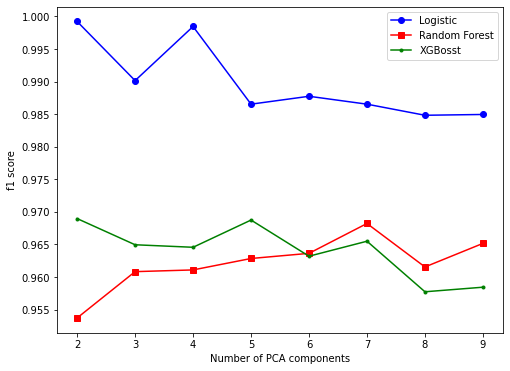

In [77]:
metric_list=pca(X_under,y_under, x_test, y_test,score="f1 score")
f1_pca=np.array(metric_list)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, f1_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, f1_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, f1_pca[:,2], color='green', marker='.',label="XGBosst")
plt.ylabel('f1 score')
plt.xlabel('Number of PCA components')
plt.legend()
plt.locator_params(tight=True, nbins=11)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

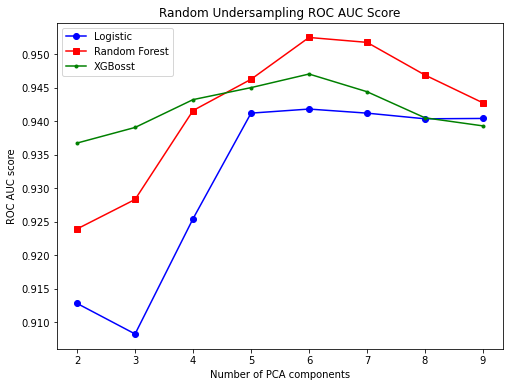

In [76]:
roc_list=pca(X_under,y_under, x_test, y_test,score="Roc Auc score")
roc_pca=np.array(roc_list)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, roc_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, roc_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, roc_pca[:,2], color='green', marker='.',label="XGBosst")
plt.title('Random Undersampling ROC AUC Score')
plt.ylabel('ROC AUC score')
plt.xlabel('Number of PCA components')
plt.legend()
plt.locator_params(tight=True, nbins=11)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

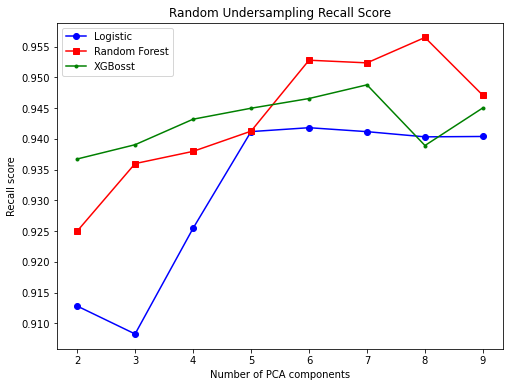

In [73]:
recall_list=pca(X_under,y_under, x_test, y_test,score="Recall score")
roc_pca=np.array(roc_list)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, roc_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, roc_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, roc_pca[:,2], color='green', marker='.',label="XGBosst")
plt.title('Random Undersampling Recall Score')
plt.ylabel('Recall score')
plt.xlabel('Number of PCA components')
plt.legend()
plt.locator_params(tight=True, nbins=11)

####Random Oversampling

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

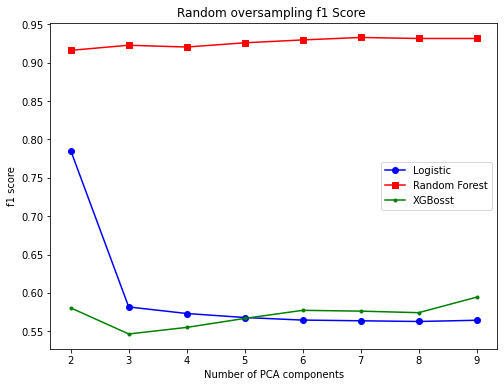

In [79]:
metric_list_over=pca(X_over,y_over, x_test, y_test,score="f1 score")
f1_pca=np.array(metric_list_over)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, f1_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, f1_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, f1_pca[:,2], color='green', marker='.',label="XGBosst")
plt.ylabel('f1 score')
plt.xlabel('Number of PCA components')
plt.title('Random oversampling f1 Score ')
plt.legend()
plt.locator_params(tight=True, nbins=11)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

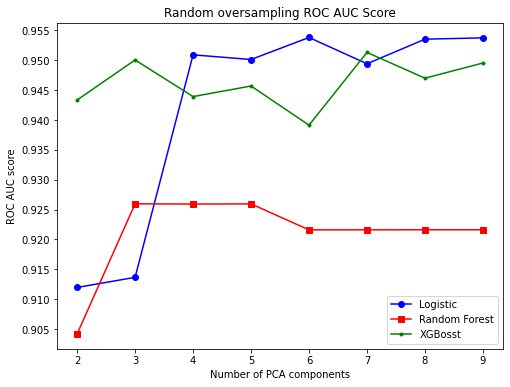

In [80]:
roc_list_over=pca(X_over,y_over, x_test, y_test,score="Roc Auc score")
roc_pca=np.array(roc_list_over)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, roc_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, roc_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, roc_pca[:,2], color='green', marker='.',label="XGBosst")
plt.title('Random oversampling ROC AUC Score')
plt.ylabel('ROC AUC score')
plt.xlabel('Number of PCA components')
plt.legend()
plt.locator_params(tight=True, nbins=11)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

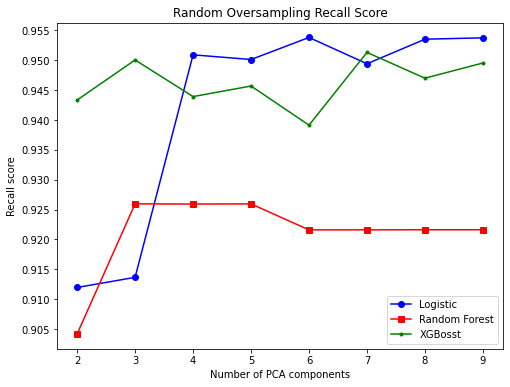

In [81]:
recall_list_over=pca(X_over,y_over, x_test, y_test,score="Recall score")
roc_pca=np.array(roc_list_over)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, roc_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, roc_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, roc_pca[:,2], color='green', marker='.',label="XGBosst")
plt.title('Random Oversampling Recall Score')
plt.ylabel('Recall score')
plt.xlabel('Number of PCA components')
plt.legend()
plt.locator_params(tight=True, nbins=11)

#### Smote

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

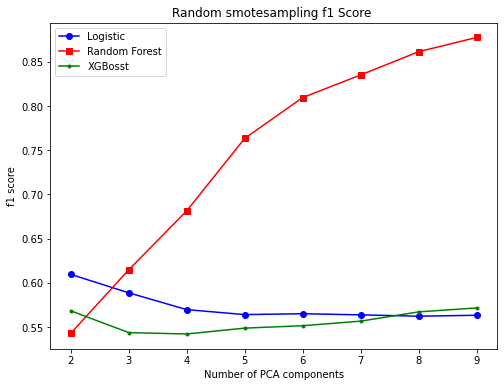

In [82]:
metric_list_smote=pca(X_smote,y_smote, x_test, y_test,score="f1 score")
f1_pca=np.array(metric_list_smote)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, f1_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, f1_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, f1_pca[:,2], color='green', marker='.',label="XGBosst")
plt.ylabel('f1 score')
plt.xlabel('Number of PCA components')
plt.title('Random smotesampling f1 Score ')
plt.legend()
plt.locator_params(tight=True, nbins=11)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

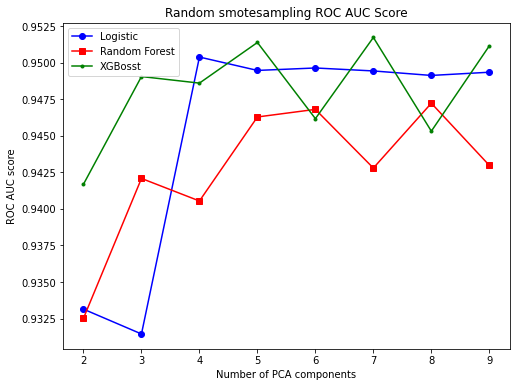

In [83]:
roc_list_smote=pca(X_smote,y_smote, x_test, y_test,score="Roc Auc score")
roc_pca=np.array(roc_list_smote)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, roc_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, roc_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, roc_pca[:,2], color='green', marker='.',label="XGBosst")
plt.title('Random smotesampling ROC AUC Score')
plt.ylabel('ROC AUC score')
plt.xlabel('Number of PCA components')
plt.legend()
plt.locator_params(tight=True, nbins=11)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

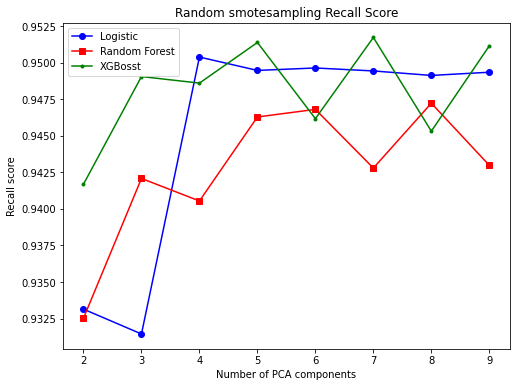

In [84]:
recall_list_smote=pca(X_smote,y_smote, x_test, y_test,score="Recall score")
roc_pca=np.array(roc_list_smote)
fig = plt.subplots(figsize =[8, 6])
x=np.array(range(2,10))
plt.plot(x, roc_pca[:,0], color='blue', marker='o',label="Logistic")
plt.plot(x, roc_pca[:,1], color='red', marker='s',label="Random Forest")
plt.plot(x, roc_pca[:,2], color='green', marker='.',label="XGBosst")
plt.title('Random smotesampling Recall Score')
plt.ylabel('Recall score')
plt.xlabel('Number of PCA components')
plt.legend()
plt.locator_params(tight=True, nbins=11)